## 7.5.2 Exercise

## Two Categorical Variables

In [1]:
library(tidyverse)
# install.packages("nycflights13")
library(nycflights13)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


1. How could you rescale the count dataset above to more clearly show the distribution of cut within colour, or colour within cut?

By calculating percentages and also showing the n.

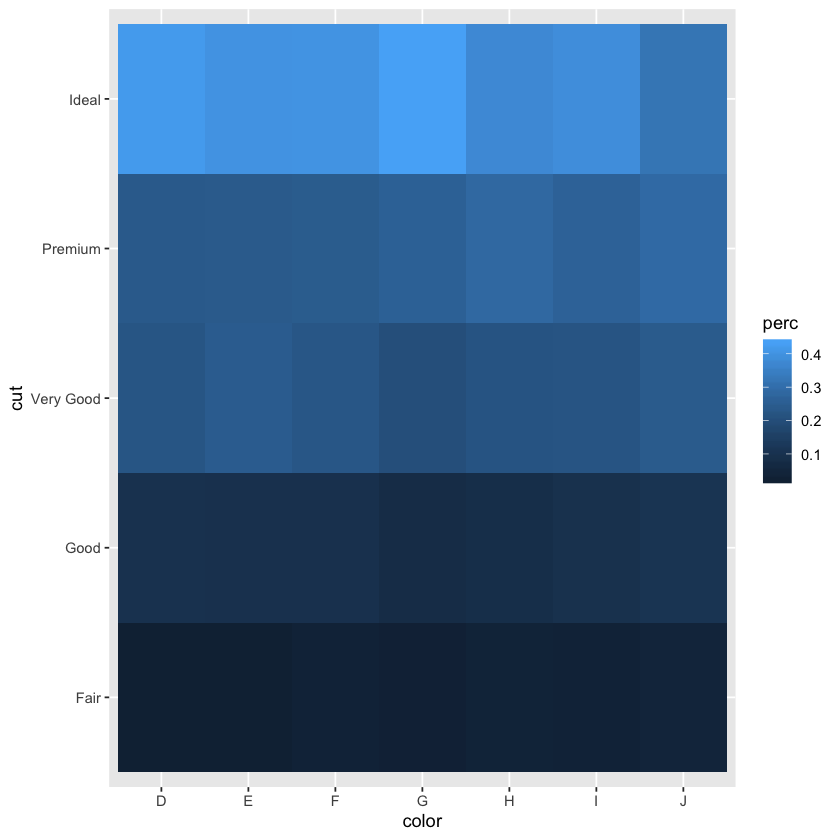

In [2]:
diamonds %>%
  count(color, cut) %>%
  group_by(color) %>%
  mutate(perc = n / sum(n)) %>%
  ggplot(aes(color, cut, fill = perc)) +
  geom_tile()

2. Use geom_tile() together with dplyr to explore how average flight delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?

One thing that makes it extremely difficult to read is that it is difficult to see differences in dep_delay because the higher values are driving the whole color palette upwards. Also, many dest have missing values on some months. Two solutions could be done: exclude dest with missing vallues for now and summarise, standardize or rescale the dep_delay so that we con spot differences.

also installing the dependency ‘gridExtra’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: viridisLite


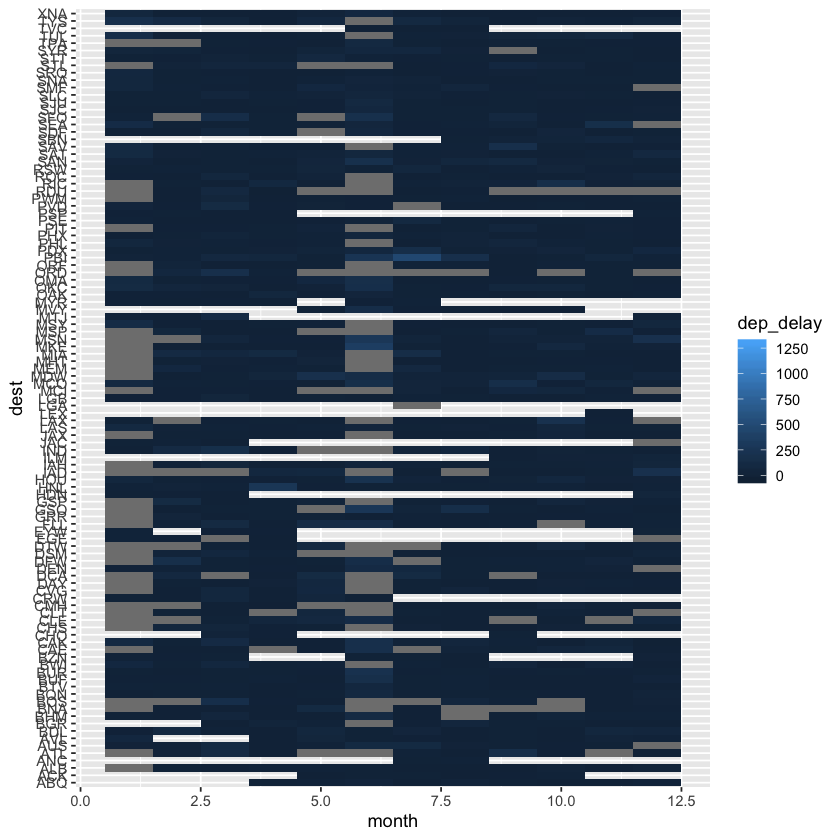

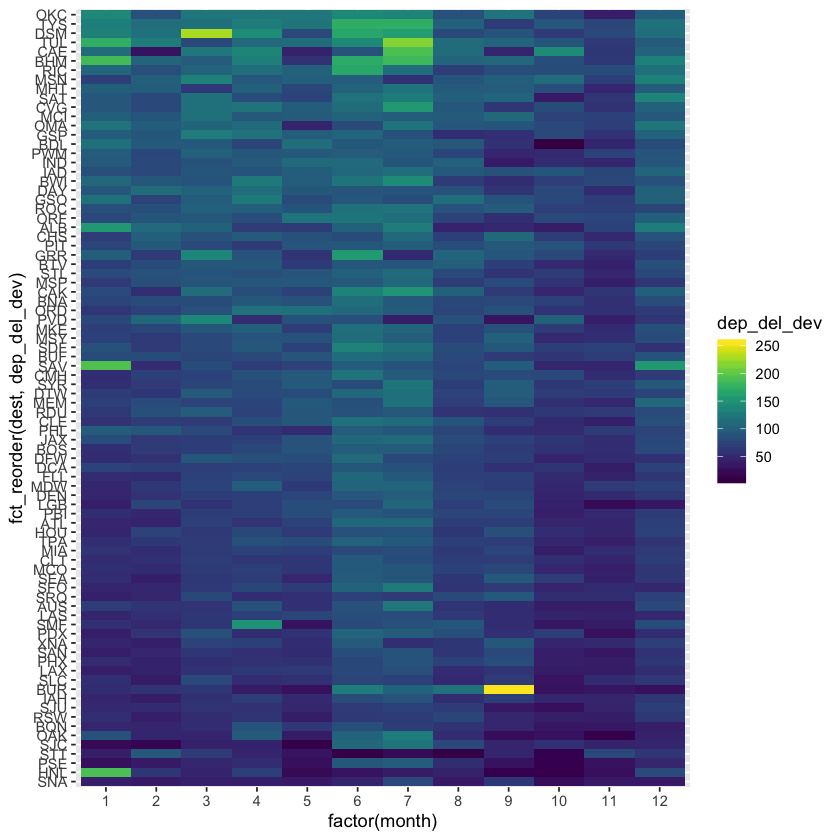

In [4]:
# install.packages("viridis")
library(viridis)
library(forcats)
flights %>%
  ggplot(aes(x = month, y = dest, fill = dep_delay)) +
  geom_tile()
flights %>%
  mutate(tot_delay = dep_delay + arr_delay) %>%
  filter(tot_delay > 0) %>%
  group_by(dest, month) %>%
  summarize(dep_del_dev = mean(tot_delay, na.rm = T)) %>%
  filter(n() == 12) %>%
  ungroup() %>%
  ggplot(aes(x = factor(month), y = fct_reorder(dest, dep_del_dev), fill = dep_del_dev)) +
  geom_tile() +
  scale_fill_viridis()

3. Why is it slightly better to use aes(x = color, y = cut) rather than aes(x = cut, y = color) in the example above?

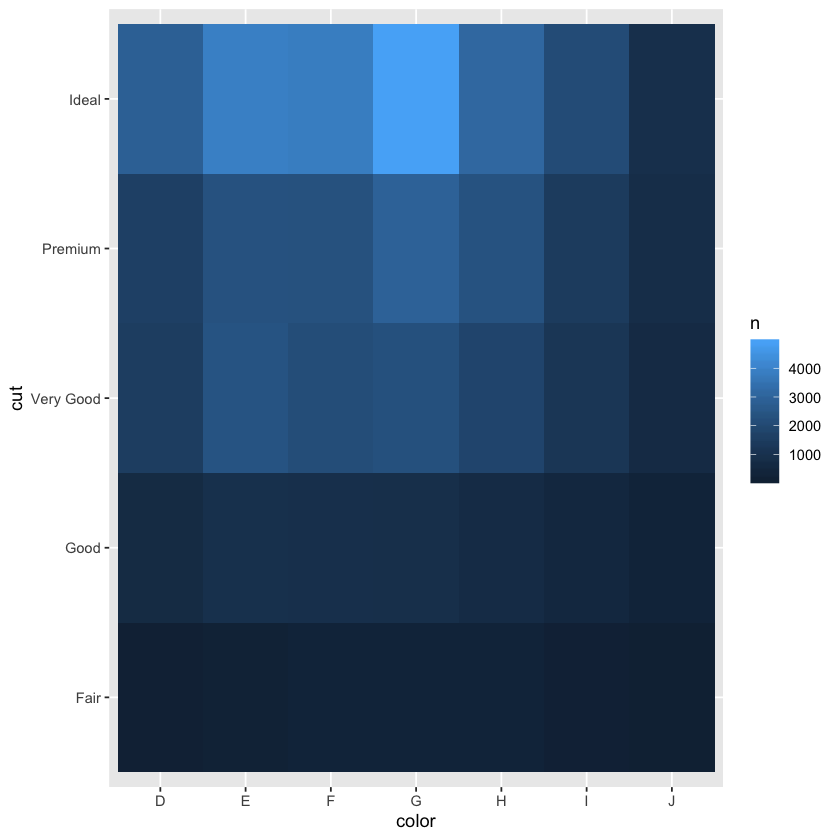

In [5]:
diamonds %>%
  count(color, cut) %>%
  ggplot(aes(x = color, y = cut)) +
  geom_tile(aes(fill = n))

Because the cut is ordered giving the impression of a scatterplot-type of intuition. Also, it's better to have names that we to interpret constantly (and are a bit lengthy) on the y axis.